In [1]:
import numpy as np
from ddm_utils import prob_rt, calculate_histogram, parse_sim_results, simulate_ddm
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

In [2]:
v=4;a=10;w=0.5 

In [3]:
sim_res = Parallel(n_jobs=-1)(delayed(simulate_ddm)(v,a) for _ in range(10000))

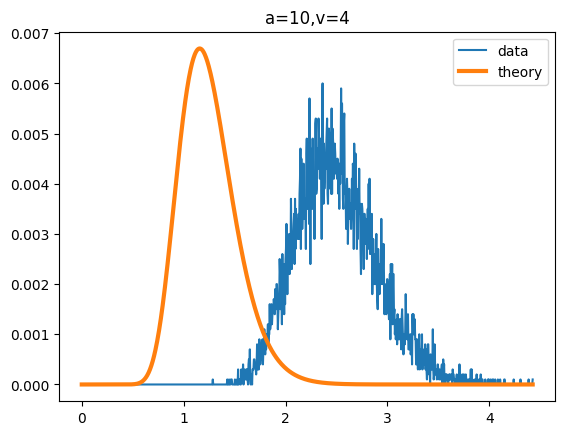

In [4]:
choices, RTs = parse_sim_results(sim_res)        
    
t_pts = np.linspace(0.0001, max(RTs), 1000)
prob = calculate_histogram(t_pts, RTs)
plt.plot(t_pts[:-1], prob); 

RT_theory = prob_rt(t_pts, v, a, w) + prob_rt(t_pts, -v, a, 1-w)
plt.plot(t_pts[:-1], RT_theory, linewidth=3);
# plt.scatter(t_pts[:-1], prob_rt(t_pts, -v, a, 1-w), color='red');
plt.title('a=10,v=4'); plt.legend(['data', 'theory'])

# plt.hist(RTs, density=True)
plt.show()

In [2]:
# load simulated data
import pickle
with open('all_sim_results.pkl', 'rb') as f:
    all_sim_results = pickle.load(f)


# params
bound_arr = np.array([2,10]); velocity_arr = np.array([-4,-3,-2,-1,0,1,2,3,4])

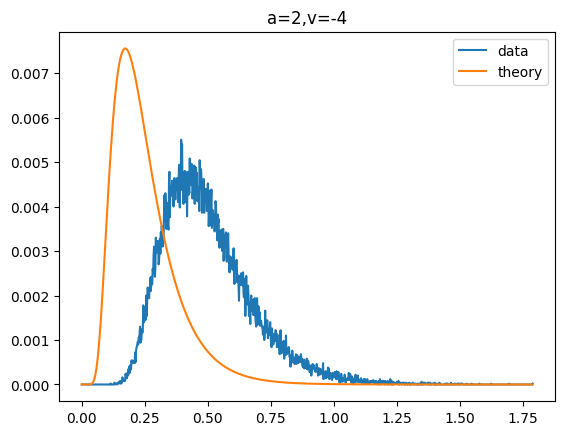

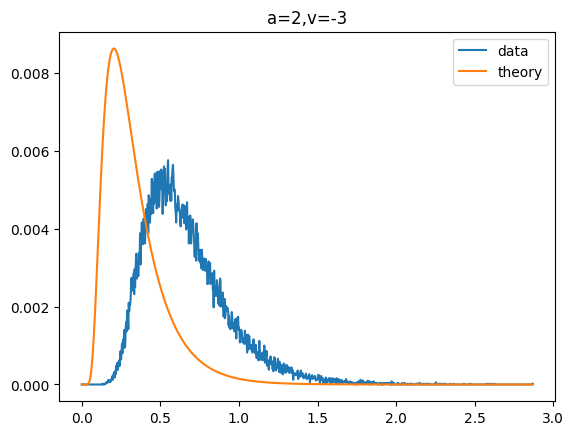

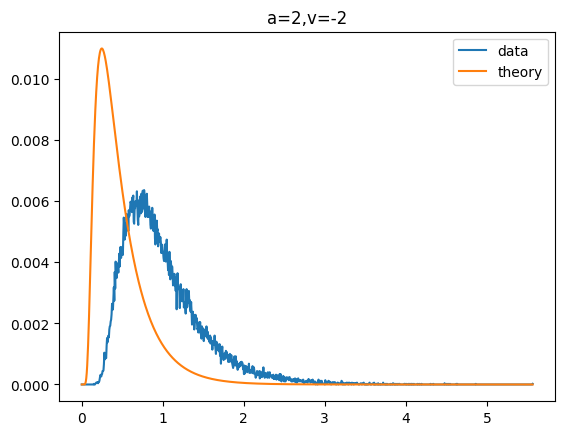

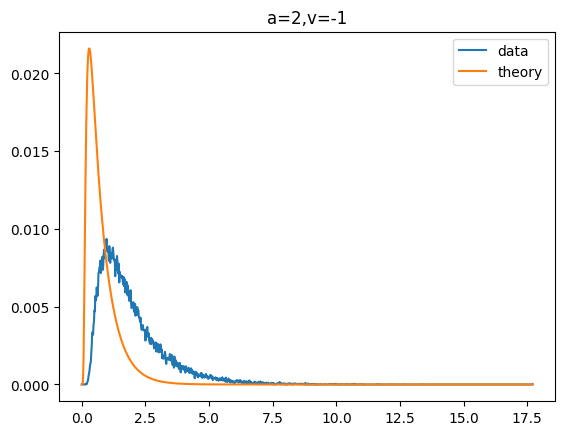

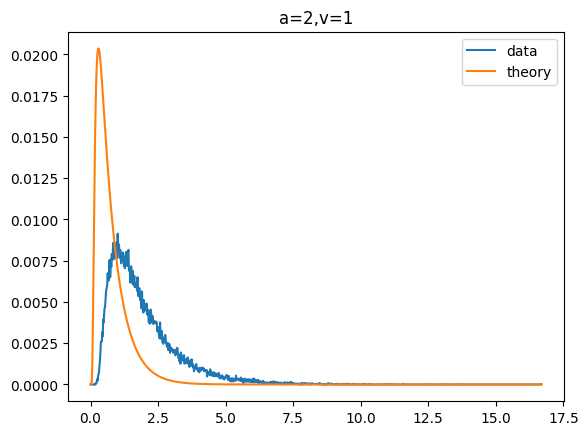

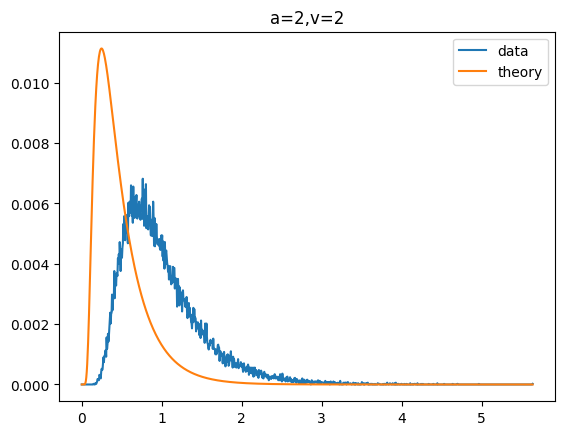

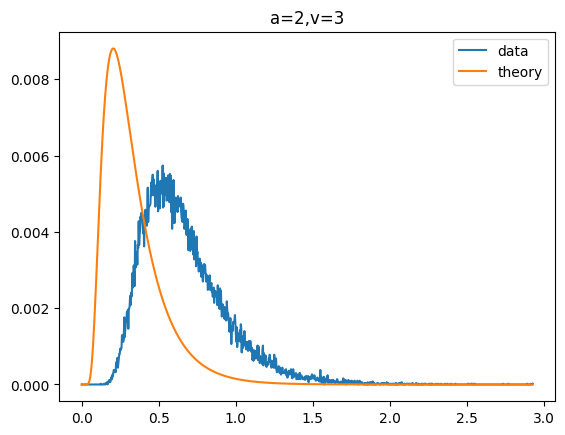

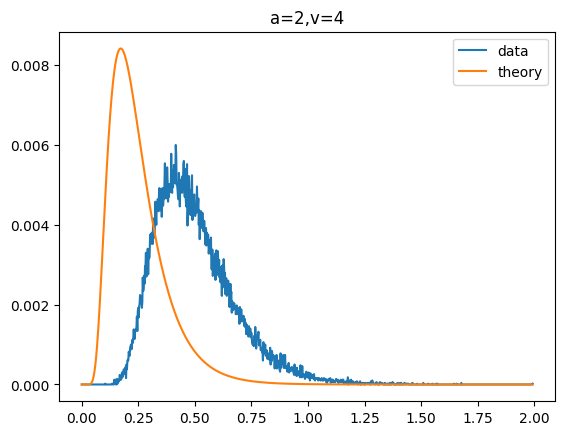

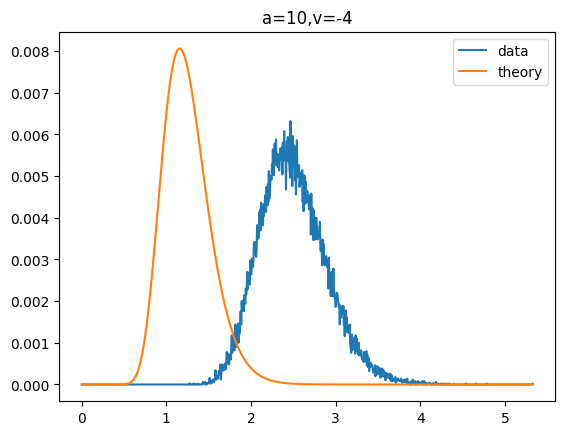

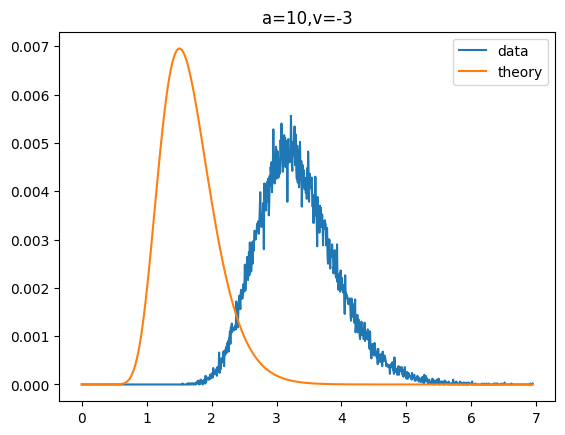

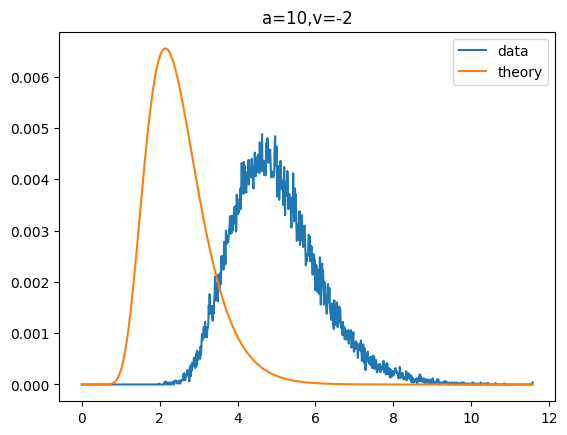

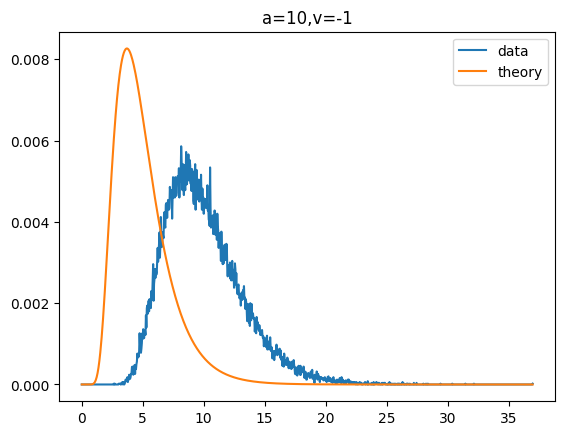

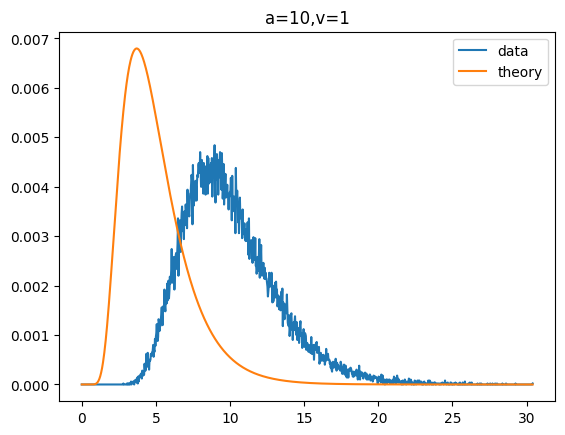

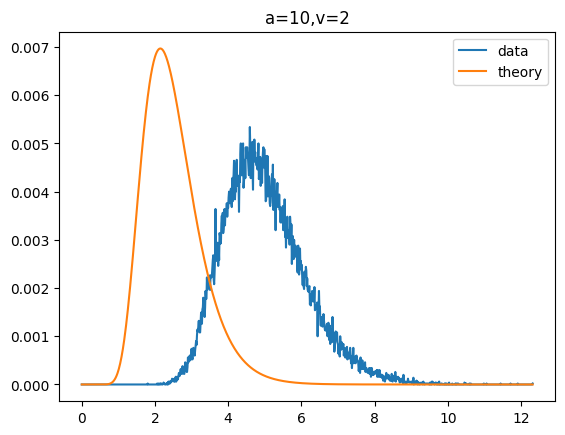

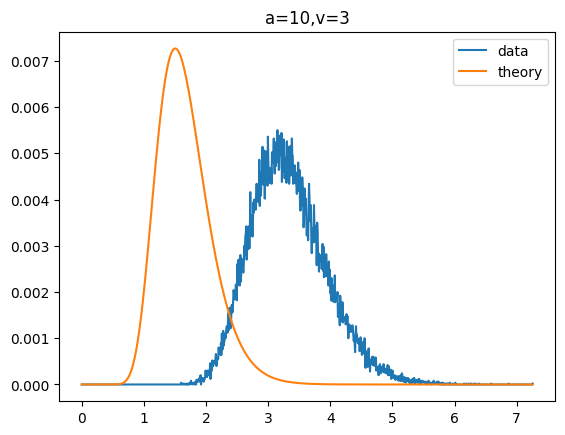

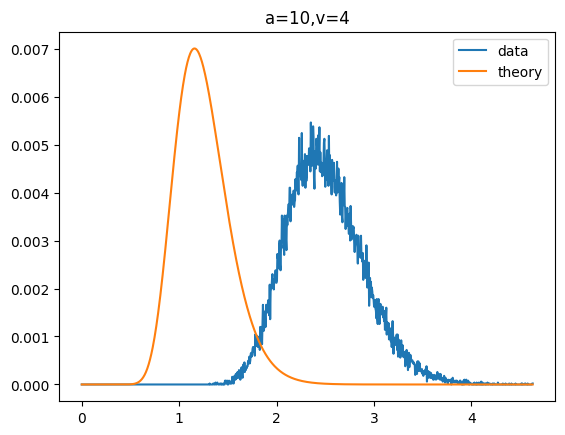

In [9]:
w = 0.5; K_max = 100
for a in bound_arr:
    for v in velocity_arr:
        if v == 0:
            continue

        keyname = f"a={str(a)},v={str(v)}"
        choices, RTs = parse_sim_results(all_sim_results[keyname])        
        
        t_pts = np.linspace(0.0001, max(RTs), 1000)
        prob = calculate_histogram(t_pts, RTs)
        plt.plot(t_pts[:-1], prob); 

        RT_theory = prob_rt(t_pts, v, a, w) + prob_rt(t_pts, -v, a, 1-w)
        plt.plot(t_pts[:-1], RT_theory);

        plt.title(keyname); plt.legend(['data', 'theory'])
        plt.show()



        # break
    # break